<a href="https://colab.research.google.com/github/nicolas-errandonea/TFG/blob/TFGcodes/boosted_betting_network_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#primero importamos la primera base de datos
from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
import random
drive.mount('/content/gdrive', force_remount=True)
path = "/content/gdrive/My Drive/la_liga_definitive.csv"
df = pd.read_csv(path)
df2 = pd.read_csv(path)

Mounted at /content/gdrive


In [ ]:
from tensorflow import keras
from keras.regularizers import l2,l1,l1_l2
from tensorflow.keras.layers import Dense,Dropout,ActivityRegularization
from keras.layers import GaussianNoise
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

In [ ]:
df2.head()

,Unnamed: 0,season,date,match_name,result,h_odd,d_odd,a_odd,home_score,away_score,...,h_targ_e2,a_targ_e2,h_pos_e2,a_pos_e2,h_shots_re_e2,a_shots_re_e2,h_targ_re_e2,a_targ_re_e2,home_hist_e,away_hist_e
0,1,2020,2021-05-23,Sevilla - Alaves,1:0,1.37,5.30,8.45,1,0,...,4.035963,4.499596,58.206342,47.116311,8.073418,7.566614,3.608898,3.411918,2.400000,0.300000
1,2,2020,2021-05-23,Granada CF - Getafe,0:0,3.01,3.31,2.46,0,0,...,2.396340,3.100065,41.770384,35.790705,12.687443,5.301031,5.932427,2.519343,2.397300,0.455700
2,3,2020,2021-05-22,Celta Vigo - Betis,2:3,3.30,3.71,2.15,2,3,...,3.238556,3.392520,48.864227,48.073396,11.166553,8.361196,3.552098,2.318446,0.964293,1.663677
3,4,2020,2021-05-22,Eibar - Barcelona,0:1,5.10,4.69,1.59,0,1,...,3.099992,3.649421,57.010542,64.496263,8.273528,8.628239,3.734877,4.183891,0.210000,2.580000
4,5,2020,2021-05-22,Elche - Ath Bilbao,2:0,2.07,3.60,3.60,2,0,...,3.431016,2.334844,54.542931,41.887565,9.629605,11.212462,3.012493,3.168779,-33.000000,-33.000000


In [ ]:
cols_to_drop = ['season', 'match_name','date','result', 'home_team', 'away_team', 'home_score', 'away_score', 'winner','h_result','d_result','away_result','h_targ_shot','a_targ_shot','h_shot','a_shot','h_pos','a_pos']

df2.drop( columns = cols_to_drop, inplace = True)


In [ ]:
df2 = df2.iloc[: , 1:]

In [ ]:
df2.head()

,h_odd,d_odd,a_odd,last_match_home,last_match_away,h_av_po,a_av_po,home_ls,away_ls,h_av_goals,...,h_targ_e2,a_targ_e2,h_pos_e2,a_pos_e2,h_shots_re_e2,a_shots_re_e2,h_targ_re_e2,a_targ_re_e2,home_hist_e,away_hist_e
0,1.37,5.30,8.45,7,7,2.222222,0.777778,17,5,1.444444,...,4.035963,4.499596,58.206342,47.116311,8.073418,7.566614,3.608898,3.411918,2.400000,0.300000
1,3.01,3.31,2.46,7,7,1.666667,0.722222,14,13,1.388889,...,2.396340,3.100065,41.770384,35.790705,12.687443,5.301031,5.932427,2.519343,2.397300,0.455700
2,3.30,3.71,2.15,6,6,1.666667,1.277778,4,6,1.555556,...,3.238556,3.392520,48.864227,48.073396,11.166553,8.361196,3.552098,2.318446,0.964293,1.663677
3,5.10,4.69,1.59,6,6,0.722222,2.111111,7,19,0.666667,...,3.099992,3.649421,57.010542,64.496263,8.273528,8.628239,3.734877,4.183891,0.210000,2.580000
4,2.07,3.60,3.60,6,6,1.111111,0.888889,1,10,0.888889,...,3.431016,2.334844,54.542931,41.887565,9.629605,11.212462,3.012493,3.168779,-33.000000,-33.000000


In [ ]:
prediction_cols=['h_result','d_result','away_result']
#test_cols=['last_match_home','last_match_away','h_av_po','a_av_po','h_av_goals','a_av_goals','h_p_prom3','a_p_prom3'] 
good_features=['h_odd','d_odd','a_odd','home_ls','away_ls', 'home_hist_e', 'a_pos_e2','away_hist_e' ,'h_shots_e2','h_targ_e2', 'h_gl_re_e2','h_av_goals','h_pos_e2', 'h_gl_e2','a_re_av_goals','h_targ_re_e2','home_e2_points_','a_targ_e2','a_gl_e2','a_shots_e2','a_pos_e','a_targ_re_e2','a_av_po','a_shots_re_e2','last_match_away','h_av_po','away_e2_points_','h_shots_re_e2','a_gl_re_e2','h_re_av_goals','last_match_home','a_av_goals','h_targ_e','h_pos_e' ]
#good_features=['home_ls','away_ls', 'home_hist_e', 'a_pos_e2','away_hist_e' ,'h_shots_e2','h_targ_e2', 'h_gl_re_e2','h_av_goals','h_pos_e2', 'h_gl_e2','a_re_av_goals','h_targ_re_e2','home_e2_points_','a_targ_e2','a_gl_e2','a_shots_e2','a_pos_e','a_targ_re_e2','a_av_po','a_shots_re_e2','last_match_away','h_av_po' ]

x = df2[good_features]          
y = df[prediction_cols]
x_train, x_valtest, y_train, y_valtest = train_test_split(x, y, train_size=0.9 )   

In [ ]:

x_test, x_val, y_test, y_val = train_test_split(x_valtest, y_valtest, test_size=0.9)


In [ ]:
fcmodel = Sequential()
fcmodel.add(Dense(1000, activation='relu', kernel_regularizer=l1_l2(l1=0.015,l2=0.0),bias_regularizer=l1_l2(l1=0.015,l2=0.0) ,activity_regularizer=l1_l2(l1=0.015,l2=0.0) ,input_shape=(34,)))

fcmodel.add(GaussianNoise(0.075, input_shape=(34,)))
# we add a second layer
# could include dropout, regularisation, ...
#fcmodel.add(Dense(50, activation='relu'))

#fcmodel.add(Dropout(0.25))

# could include dropout, regularisation, ...
fcmodel.add(Dense(3, activation='softmax'))

In [ ]:
fcmodel.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate=0.0001),
             metrics=['accuracy'])

In [ ]:
batch_size = 10
epochs =2000

In [ ]:
history = fcmodel.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_val, y_val))

Epoch 1/2000
137/137 [==============================] - 1s 3ms/step - loss: 40.3052 - accuracy: 0.4137 - val_loss: 32.7301 - val_accuracy: 0.3358
Epoch 2/2000
137/137 [==============================] - 0s 2ms/step - loss: 26.5038 - accuracy: 0.4576 - val_loss: 22.6359 - val_accuracy: 0.3942
Epoch 3/2000
137/137 [==============================] - 0s 2ms/step - loss: 19.1948 - accuracy: 0.4605 - val_loss: 17.2127 - val_accuracy: 0.4307
Epoch 4/2000
137/137 [==============================] - 0s 2ms/step - loss: 14.9375 - accuracy: 0.4700 - val_loss: 13.6375 - val_accuracy: 0.4526
Epoch 5/2000
137/137 [==============================] - 0s 2ms/step - loss: 11.9355 - accuracy: 0.4788 - val_loss: 10.8743 - val_accuracy: 0.4307
Epoch 6/2000
137/137 [==============================] - 0s 2ms/step - loss: 9.6263 - accuracy: 0.4890 - val_loss: 8.8646 - val_accuracy: 0.4307
Epoch 7/2000
137/137 [==============================] - 0s 2ms/step - loss: 7.8866 - accuracy: 0.4708 - val_loss: 7.2691 - val

In [ ]:
score = fcmodel.evaluate(x_valtest, y_valtest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1236356496810913
Test accuracy: 0.4802631437778473


In [ ]:
y_valtest.head()

,h_result,d_result,away_result
528,1,0,0
625,0,1,0
1367,1,0,0
94,0,1,0
82,0,0,1


In [ ]:
#comprobacion
total=len(y_valtest.index)
aciertos=0
for i in y_valtest.index:
   minimo=min(df.h_odd[i],df.d_odd[i],df.a_odd[i])
   if(df.h_result[i]==1 and minimo==df.h_odd[i]):
     aciertos=aciertos+1
   if(df.d_result[i]==1 and minimo==df.d_odd[i]):
     aciertos=aciertos+1
     
   if(df.away_result[i]==1 and minimo==df.a_odd[i]):
     aciertos=aciertos+1
print(aciertos/total)

NameError: ignored

In [ ]:
def histplot(history):
    hist = pd.DataFrame(history.history)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    hist.plot(y=['loss','val_loss'], ax=ax1)
    min_loss = hist['val_loss'].min()
    ax1.hlines(min_loss, 0, len(hist), linestyle='dotted',
               label='min(val_loss) = {:.3f}'.format(min_loss))
    ax1.legend(loc='upper right')
    hist.plot(y=['accuracy','val_accuracy'], ax=ax2)
    max_acc = hist['val_accuracy'].max()
    ax2.hlines(max_acc, 0, len(hist), linestyle='dotted',
               label='max(val_accuracy) = {:.3f}'.format(max_acc))
    ax2.legend(loc='lower right', fontsize='large')

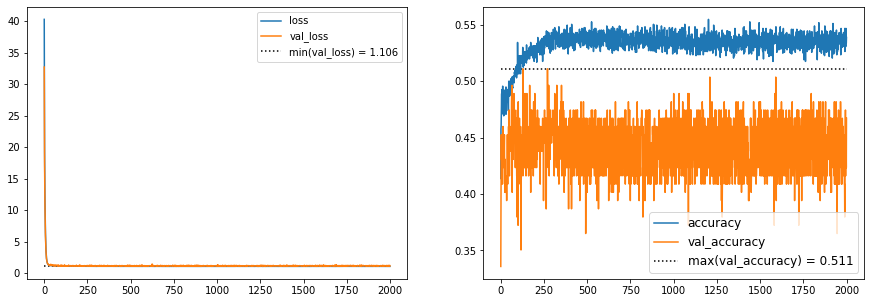

In [ ]:
histplot(history)

In [ ]:
house=[]
my_bet=[]


for j in range(50):
 prediction_cols=['h_result','d_result','away_result']
 good_features=['h_odd','d_odd','a_odd']#,'home_ls','away_ls', 'home_hist_e', 'a_pos_e2','away_hist_e' ,'h_shots_e2','h_targ_e2', 'h_gl_re_e2','h_av_goals','h_pos_e2', 'h_gl_e2','a_re_av_goals','h_targ_re_e2','home_e2_points_','a_targ_e2','a_gl_e2','a_shots_e2','a_pos_e','a_targ_re_e2','a_av_po','a_shots_re_e2','last_match_away','h_av_po','away_e2_points_','h_shots_re_e2','a_gl_re_e2','h_re_av_goals','last_match_home','a_av_goals','h_targ_e','h_pos_e' ]
 x = df2[good_features]          
 y = df[prediction_cols]
 x_train, x_valtest, y_train, y_valtest = train_test_split(x, y, train_size=0.9)  
 x_test, x_val, y_test, y_val = train_test_split(x_valtest, y_valtest, test_size=0.9)
 fcmodel = Sequential()
 #fcmodel.add(Dense(1000, activation='relu', kernel_regularizer=l1_l2(l1=0.015,l2=0.0),bias_regularizer=l1_l2(l1=0.015,l2=0.0) ,input_shape=(34,)))
 fcmodel.add(Dense(3, activation='relu' ,input_shape=(3,)))
 fcmodel.add(Dense(10, activation='relu', ))

 #fcmodel.add(GaussianNoise(0.05, input_shape=(34,)))
 fcmodel.add(Dense(3, activation='softmax'))
 fcmodel.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(),
                metrics=['accuracy'])
 batch_size = 10
 epochs =60
 history = fcmodel.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_val, y_val))
 score = fcmodel.evaluate(x_valtest, y_valtest, verbose=0)
 my_bet.append(score[1])
 

 total=len(y_valtest.index)
 aciertos=0
 for i in y_valtest.index:
   minimo=min(df.h_odd[i],df.d_odd[i],df.a_odd[i])
   if(df.h_result[i]==1 and minimo==df.h_odd[i]):
     aciertos=aciertos+1
   if(df.d_result[i]==1 and minimo==df.d_odd[i]):
     aciertos=aciertos+1
     
   if(df.away_result[i]==1 and minimo==df.a_odd[i]):
     aciertos=aciertos+1
 house.append(aciertos/total)

import statistics
print(statistics.mean(house))
print(statistics.mean(my_bet))

Se han truncado las últimas 5000 líneas del flujo de salida.
Epoch 22/60
137/137 [==============================] - 0s 2ms/step - loss: 0.9866 - accuracy: 0.5227 - val_loss: 1.0156 - val_accuracy: 0.4964
Epoch 23/60
137/137 [==============================] - 0s 2ms/step - loss: 0.9857 - accuracy: 0.5256 - val_loss: 1.0232 - val_accuracy: 0.4672
Epoch 24/60
137/137 [==============================] - 0s 2ms/step - loss: 0.9840 - accuracy: 0.5314 - val_loss: 1.0271 - val_accuracy: 0.4599
Epoch 25/60
137/137 [==============================] - 0s 2ms/step - loss: 0.9860 - accuracy: 0.5234 - val_loss: 1.0174 - val_accuracy: 0.5036
Epoch 26/60
137/137 [==============================] - 0s 2ms/step - loss: 0.9842 - accuracy: 0.5249 - val_loss: 1.0216 - val_accuracy: 0.4599
Epoch 27/60
137/137 [==============================] - 0s 2ms/step - loss: 0.9849 - accuracy: 0.5270 - val_loss: 1.0207 - val_accuracy: 0.4599
Epoch 28/60
137/137 [==============================] - 0s 2ms/step - loss: 0.9852

In [ ]:
print(house)
print(my_bet)

[0.5197368421052632, 0.5131578947368421, 0.5789473684210527, 0.5592105263157895, 0.5657894736842105, 0.5526315789473685, 0.506578947368421, 0.5131578947368421, 0.5394736842105263, 0.5592105263157895, 0.4934210526315789, 0.506578947368421, 0.5789473684210527, 0.506578947368421, 0.47368421052631576, 0.5657894736842105, 0.5657894736842105, 0.5263157894736842, 0.5526315789473685, 0.5328947368421053, 0.5394736842105263, 0.47368421052631576, 0.5460526315789473, 0.5460526315789473, 0.5460526315789473, 0.5789473684210527, 0.4934210526315789, 0.5657894736842105, 0.5, 0.5197368421052632, 0.46710526315789475, 0.5131578947368421, 0.5394736842105263, 0.5263157894736842, 0.5328947368421053, 0.4934210526315789, 0.5526315789473685, 0.4934210526315789, 0.4934210526315789, 0.5328947368421053, 0.5526315789473685, 0.48026315789473684, 0.5592105263157895, 0.5263157894736842, 0.5328947368421053, 0.5131578947368421, 0.5131578947368421, 0.5197368421052632, 0.5131578947368421, 0.5394736842105263]
[0.5131579041

In [ ]:
house=[]
my_bet=[]


for j in range(50):
 prediction_cols=['h_result','d_result','away_result']
 good_features=['h_odd','d_odd','a_odd','home_ls','away_ls', 'home_hist_e', 'a_pos_e2','away_hist_e' ,'h_shots_e2','h_targ_e2', 'h_gl_re_e2','h_av_goals','h_pos_e2', 'h_gl_e2','a_re_av_goals','h_targ_re_e2','home_e2_points_','a_targ_e2','a_gl_e2','a_shots_e2','a_pos_e','a_targ_re_e2','a_av_po','a_shots_re_e2','last_match_away','h_av_po','away_e2_points_','h_shots_re_e2','a_gl_re_e2','h_re_av_goals','last_match_home','a_av_goals','h_targ_e','h_pos_e' ]
 x = df2[good_features]          
 y = df[prediction_cols]
 x_train, x_valtest, y_train, y_valtest = train_test_split(x, y, train_size=0.9)  
 x_test, x_val, y_test, y_val = train_test_split(x_valtest, y_valtest, test_size=0.9)
 fcmodel = Sequential()
 fcmodel.add(Dense(1000, activation='relu', kernel_regularizer=l1_l2(l1=0.015,l2=0.0),bias_regularizer=l1_l2(l1=0.015,l2=0.0) ,activity_regularizer=l1_l2(l1=0.015,l2=0.0),input_shape=(34,)))
 fcmodel.add(GaussianNoise(0.05, input_shape=(34,)))
 fcmodel.add(Dense(3, activation='softmax'))
 fcmodel.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate=0.0001),
                metrics=['accuracy'])
 batch_size = 24
 epochs =1200
 history = fcmodel.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_val, y_val))
 score = fcmodel.evaluate(x_valtest, y_valtest, verbose=0)
 my_bet.append(score[1])
 

 total=len(y_valtest.index)
 aciertos=0
 for i in y_valtest.index:
   minimo=min(df.h_odd[i],df.d_odd[i],df.a_odd[i])
   if(df.h_result[i]==1 and minimo==df.h_odd[i]):
     aciertos=aciertos+1
   if(df.d_result[i]==1 and minimo==df.d_odd[i]):
     aciertos=aciertos+1
     
   if(df.away_result[i]==1 and minimo==df.a_odd[i]):
     aciertos=aciertos+1
 house.append(aciertos/total)

import statistics
print(statistics.mean(house))
print(statistics.mean(my_bet))

Se han truncado las últimas 5000 líneas del flujo de salida.
57/57 [==============================] - 0s 6ms/step - loss: 7.1712 - accuracy: 0.4912 - val_loss: 6.7526 - val_accuracy: 0.4672
Epoch 14/1200
57/57 [==============================] - 0s 6ms/step - loss: 6.3122 - accuracy: 0.4971 - val_loss: 5.9633 - val_accuracy: 0.4599
Epoch 15/1200
57/57 [==============================] - 0s 7ms/step - loss: 5.5649 - accuracy: 0.4883 - val_loss: 5.2708 - val_accuracy: 0.4599
Epoch 16/1200
57/57 [==============================] - 0s 6ms/step - loss: 4.9239 - accuracy: 0.5000 - val_loss: 4.6721 - val_accuracy: 0.4526
Epoch 17/1200
57/57 [==============================] - 0s 7ms/step - loss: 4.3691 - accuracy: 0.5044 - val_loss: 4.1570 - val_accuracy: 0.4818
Epoch 18/1200
57/57 [==============================] - 0s 6ms/step - loss: 3.8885 - accuracy: 0.4890 - val_loss: 3.7088 - val_accuracy: 0.4745
Epoch 19/1200
57/57 [==============================] - 0s 6ms/step - loss: 3.4732 - accuracy: 0

In [ ]:
print(house)
print(my_bet)